In [3]:
import numpy as np
import itertools
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
d_atm2vlc={'C':4,'H':1,'F':1,'O':2,'N':3}


l_p_atm=['C','F','C','H','F']
l_p_atm=l_p_atm.copy()
l_vlc=[]
for atm in l_p_atm:
    l_vlc.append(d_atm2vlc[atm])
arg_s=np.argsort(l_vlc)[::-1]
l_p_atm=np.array(l_p_atm)[arg_s]
l_vlc=np.array(l_vlc)[arg_s]
n_atm=len(l_p_atm)
generated=False

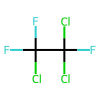

Symbol: C
Num: 6
Valence: 4

Symbol: C
Num: 6
Valence: 4

Symbol: F
Num: 9
Valence: 1

Symbol: Cl
Num: 17
Valence: 1

Symbol: Cl
Num: 17
Valence: 1

Symbol: F
Num: 9
Valence: 1

Symbol: F
Num: 9
Valence: 1

Symbol: Cl
Num: 17
Valence: 1



In [97]:
mol=Chem.MolFromSmiles("C(C(F)(Cl)Cl)(F)(F)Cl")
mol=Chem.AddHs(mol)
display(Draw.MolToImage(mol,size=(100,100)))

atm_list=[]
for atm in mol.GetAtoms():
    atm_list.append(atm)
    print("Symbol:",atm.GetSymbol())
    print("Num:",atm.GetAtomicNum())
    print("Valence:",atm.GetExplicitValence())
    print()

In [122]:
list(mol.GetAtoms())

In [99]:
s_atm_list=sorted(atm_list,key=lambda x: (x.GetExplicitValence(),x.GetAtomicNum()),reverse=True)
for atm in s_atm_list:
    print("Symbol:",atm.GetSymbol())
    print("Num:",atm.GetAtomicNum())
    print("Valence:",atm.GetExplicitValence())
    print()

Symbol: C
Num: 6
Valence: 4

Symbol: C
Num: 6
Valence: 4

Symbol: Cl
Num: 17
Valence: 1

Symbol: Cl
Num: 17
Valence: 1

Symbol: Cl
Num: 17
Valence: 1

Symbol: F
Num: 9
Valence: 1

Symbol: F
Num: 9
Valence: 1

Symbol: F
Num: 9
Valence: 1



In [120]:
str_atm_list=["C","C","F","H"]
atm_list=[]
for str_atm in str_atm_list:
    atm_list.append(Chem.AtomFromSmiles("["+str_atm+"]"))

In [111]:
vlc_list=[]
s_atm_list=sorted(atm_list,key=lambda x: (x.GetExplicitValence(),x.GetAtomicNum()),reverse=True)
for atm in s_atm_list:
    vlc_list.append(atm.GetExplicitValence())
num_atm=len(atm_list)

In [118]:
l_bond_p=[[[0]*num_atm]]
for k in range(1,self.num_atm):
    #重複組み合わせの玉の種類。
    #三角形の横方向の数+1

    #詳しくは足してnになる組み合わせの数の応用の
    #足してn以下になる組み合わせの数を参照
    conb_rep_kind=k+1
    # 結合する相手の原子の数への結合数が
    # 足して価電子数(valence_num)以下なるような場合の数
    # =注目している結合する相手の原子の数+1種類の玉から
    # 重複して選ぶときの場合の数
    valence_num=vlc_list[k]
    comb_rep_list=list(itertools.combinations_with_replacement(list(range(conb_rep_kind)),valence_num))
    l_bond_r_p=[]
    #隣接行列のある1行が取りうる行のリスト
    for i in range(len(comb_rep_list)):
        l_bond=[0]*num_atm
        for j in range(conb_rep_kind-1):
            # 結合数=ある玉の数
            b_num=comb_rep_list[i].count(j)
            if(b_num>=4):
                break
            l_bond[j]=b_num
        else:
            l_bond_r_p.append(l_bond)
    l_bond_p.append(l_bond_r_p)

In [117]:
l_bond_r_p

[[3, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [106]:
l_cr=list(itertools.combinations_with_replacement(list(range(3)),4))
print(l_cr)
len(l_cr)

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 2, 2), (0, 1, 1, 1), (0, 1, 1, 2), (0, 1, 2, 2), (0, 2, 2, 2), (1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 2), (1, 2, 2, 2), (2, 2, 2, 2)]


15

In [71]:
peri_tab=Chem.GetPeriodicTable()
for i in peri_tab.GetValenceList(19):
    print(i)

1


In [135]:
peri_tab.GetAtomicNumber("N")
peri_tab.GetDefaultValence(atm.GetAtomicNum())

4

In [134]:
atm=atm_list[0]
atm.GetTotalValence()

RuntimeError: Pre-condition Violation
	valence not defined for atoms not associated with molecules
	Violation occurred on line 204 in file Code/GraphMol/Atom.cpp
	Failed Expression: dp_mol
	RDKIT: 2020.09.5
	BOOST: 1_74


In [88]:
import pubchempy as pcp

In [90]:
comp_list=pcp.get_compounds("76-13-1", 'name')

In [96]:
comp_list[0].canonical_smiles

'C(C(F)(Cl)Cl)(F)(F)Cl'

In [89]:
l_p_atm

array(['C', 'C', 'F', 'H', 'F'], dtype='<U1')